# Homework-X2: MLP for MNIST Classification

### In this homework, you need to
- #### implement SGD optimizer (`./optimizer.py`)
- #### implement forward and backward for FCLayer (`layers/fc_layer.py`)
- #### implement forward and backward for SigmoidLayer (`layers/sigmoid_layer.py`)
- #### implement forward and backward for ReLULayer (`layers/relu_layer.py`)
- #### implement EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### implement SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## Load MNIST Dataset
We use tensorflow tools to load dataset for convenience.

In [26]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(tf.keras.utils.get_file("mnist.npz", origin="https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz"))

/home/nieruichen/.keras/datasets/mnist.npz


In [27]:
def decode_image(image):
    # Normalize from [0, 255.] to [0., 1.0], and then subtract by the mean value
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # Encode label with one-hot encoding
    return tf.one_hot(label, depth=10)

In [28]:
# Data Preprocessing
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## Set Hyerparameters
You can modify hyerparameters by yourself.

In [5]:
batch_size = 100
max_epoch = 20
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.1

disp_freq = 50

## 1. MLP with Euclidean Loss
In part-1, you need to train a MLP with **Euclidean Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively.
### TODO
Before executing the following code, you should complete **./optimizer.py** and **criterion/euclidean_loss.py**.

In [6]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 MLP with Euclidean Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/fc_layer.py** and **layers/sigmoid_layer.py**.

In [7]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [8]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.


I0000 00:00:1760591676.281593 1032466 mlir_graph_optimization_pass.cc:437] MLIR V1 optimization pass is not enabled


Epoch [0][20]	 Batch [0][550]	 Training Loss 7.2262	 Accuracy 0.1400
Epoch [0][20]	 Batch [50][550]	 Training Loss 7.0657	 Accuracy 0.1100
Epoch [0][20]	 Batch [100][550]	 Training Loss 6.9439	 Accuracy 0.1131
Epoch [0][20]	 Batch [150][550]	 Training Loss 6.7947	 Accuracy 0.1110
Epoch [0][20]	 Batch [200][550]	 Training Loss 6.6431	 Accuracy 0.1126
Epoch [0][20]	 Batch [250][550]	 Training Loss 6.5059	 Accuracy 0.1123
Epoch [0][20]	 Batch [300][550]	 Training Loss 6.3681	 Accuracy 0.1128
Epoch [0][20]	 Batch [350][550]	 Training Loss 6.2326	 Accuracy 0.1124
Epoch [0][20]	 Batch [400][550]	 Training Loss 6.1039	 Accuracy 0.1126
Epoch [0][20]	 Batch [450][550]	 Training Loss 5.9799	 Accuracy 0.1124
Epoch [0][20]	 Batch [500][550]	 Training Loss 5.8586	 Accuracy 0.1127

Epoch [0]	 Average training loss 5.7468	 Average training accuracy 0.1132
Epoch [0]	 Average validation loss 4.4870	 Average validation accuracy 0.1168

Epoch [1][20]	 Batch [0][550]	 Training Loss 4.4464	 Accuracy 0.1400

In [9]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.1157.



## 1.2 MLP with Euclidean Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/relu_layer.py**.

In [10]:
from layers import ReLULayer

reluMLP = Network()
# TODO build ReLUMLP with FCLayer and ReLULayer
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [11]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 4.7539	 Accuracy 0.1100
Epoch [0][20]	 Batch [50][550]	 Training Loss 4.8431	 Accuracy 0.0914
Epoch [0][20]	 Batch [100][550]	 Training Loss 4.8122	 Accuracy 0.0870
Epoch [0][20]	 Batch [150][550]	 Training Loss 4.7437	 Accuracy 0.0881
Epoch [0][20]	 Batch [200][550]	 Training Loss 4.6163	 Accuracy 0.0876
Epoch [0][20]	 Batch [250][550]	 Training Loss 4.5237	 Accuracy 0.0890
Epoch [0][20]	 Batch [300][550]	 Training Loss 4.4204	 Accuracy 0.0893
Epoch [0][20]	 Batch [350][550]	 Training Loss 4.3164	 Accuracy 0.0900
Epoch [0][20]	 Batch [400][550]	 Training Loss 4.2409	 Accuracy 0.0903
Epoch [0][20]	 Batch [450][550]	 Training Loss 4.1616	 Accuracy 0.0901
Epoch [0][20]	 Batch [500][550]	 Training Loss 4.0751	 Accuracy 0.0903

Epoch [0]	 Average training loss 4.0011	 Average training accuracy 0.0907
Epoch [0]	 Average validation loss 3.2044	 Average validation accuracy 0.0896

Epoch [1][20]	 Batch [0][550]	 Training Loss 3.0091	 Accuracy 0.1100

In [12]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.1121.



## Plot

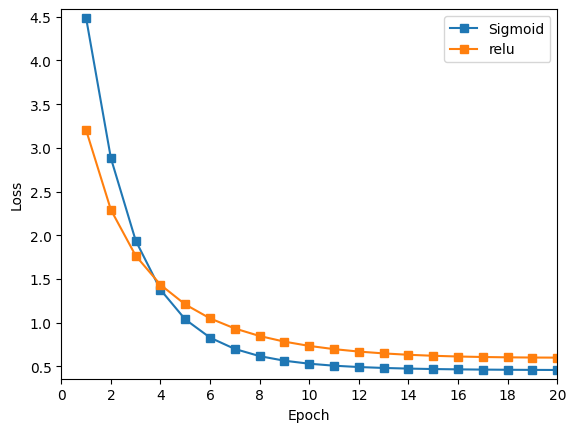

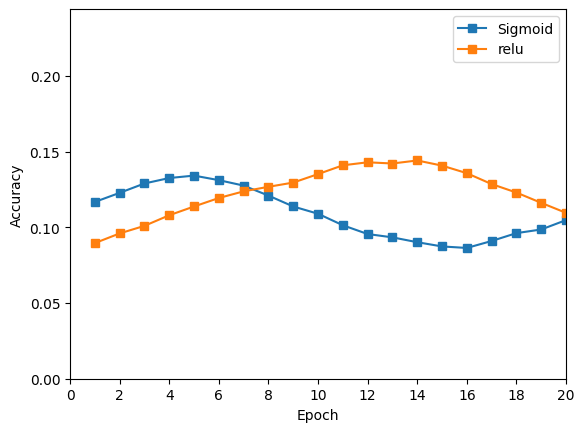

In [13]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. MLP with Softmax Cross-Entropy Loss
In part-2, you need to train a MLP with **Softmax Cross-Entropy Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively again.
### TODO
Before executing the following code, you should complete **criterion/softmax_cross_entropy_loss.py**.

In [14]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 MLP with Softmax Cross-Entropy Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Softmax cross-entropy loss function.

In [15]:
sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### Train

In [16]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.5552	 Accuracy 0.1700
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.5792	 Accuracy 0.1475
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.5813	 Accuracy 0.1433
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.5750	 Accuracy 0.1450
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.5710	 Accuracy 0.1448
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.5721	 Accuracy 0.1441
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.5707	 Accuracy 0.1441
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.5668	 Accuracy 0.1442
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.5665	 Accuracy 0.1441
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.5627	 Accuracy 0.1448
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.5616	 Accuracy 0.1438

Epoch [0]	 Average training loss 2.5601	 Average training accuracy 0.1437
Epoch [0]	 Average validation loss 2.5325	 Average validation accuracy 0.1542

Epoch [1][20]	 Batch [0][550]	 Training Loss 2.5137	 Accuracy 0.1700

### Test

In [17]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.1019.



## 2.2 MLP with Softmax Cross-Entropy Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Softmax cross-entropy loss function.

In [18]:
reluMLP = Network()
# Build ReLUMLP with FCLayer and ReLULayer
# 128 is the number of hidden units, you can change by your own
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [19]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.5281	 Accuracy 0.0700
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.4849	 Accuracy 0.1092
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.4830	 Accuracy 0.1087
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.4781	 Accuracy 0.1089
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.4731	 Accuracy 0.1096
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.4755	 Accuracy 0.1085
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.4713	 Accuracy 0.1101
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.4676	 Accuracy 0.1099
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.4676	 Accuracy 0.1095
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.4655	 Accuracy 0.1089
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.4645	 Accuracy 0.1082

Epoch [0]	 Average training loss 2.4607	 Average training accuracy 0.1084
Epoch [0]	 Average validation loss 2.4298	 Average validation accuracy 0.1072

Epoch [1][20]	 Batch [0][550]	 Training Loss 2.4736	 Accuracy 0.0800

In [20]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.1009.



## Plot

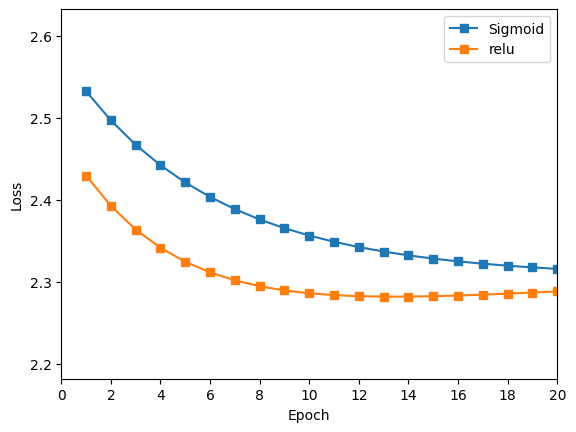

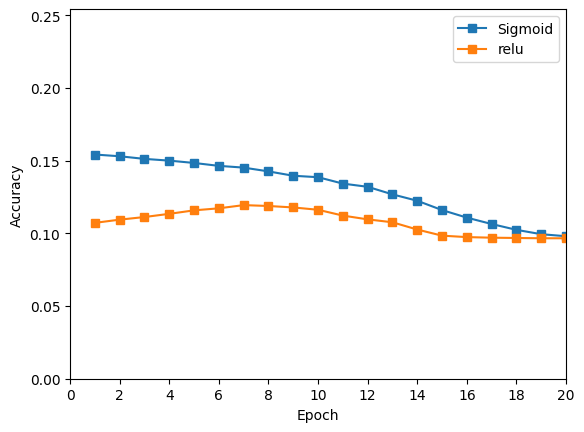

In [21]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

### ~~You have finished homework X2, congratulations!~~  

**Next, according to the requirements 4) of report:**
### **You need to construct a two-hidden-layer MLP, using any activation function and loss function.**

**Note: Please insert some new cells blow (using '+' bottom in the toolbar) refer to above codes. Do not modify the former code directly.**

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.5365	 Accuracy 0.1100
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.5417	 Accuracy 0.1167
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.5458	 Accuracy 0.1082
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.5354	 Accuracy 0.1120
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.5307	 Accuracy 0.1110
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.5294	 Accuracy 0.1106
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.5279	 Accuracy 0.1097
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.5258	 Accuracy 0.1084
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.5234	 Accuracy 0.1093
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.5215	 Accuracy 0.1096
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.5173	 Accuracy 0.1104

Epoch [0]	 Average training loss 2.5144	 Average training accuracy 0.1104
Epoch [0]	 Average validation loss 2.4887	 Average validation accuracy 0.1054

Epoch [1][20]	 Batch [0][550]	 Training Loss 2.4678	 Accuracy 0.1200

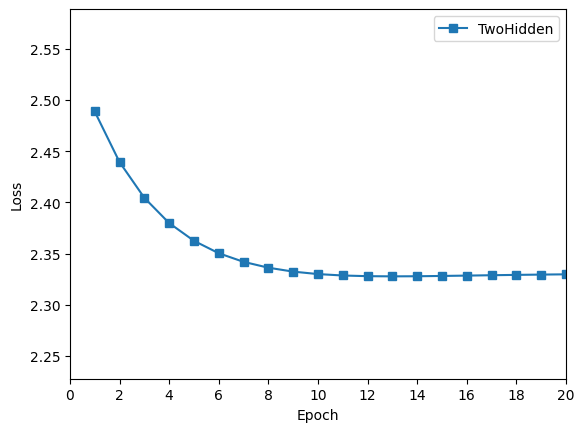

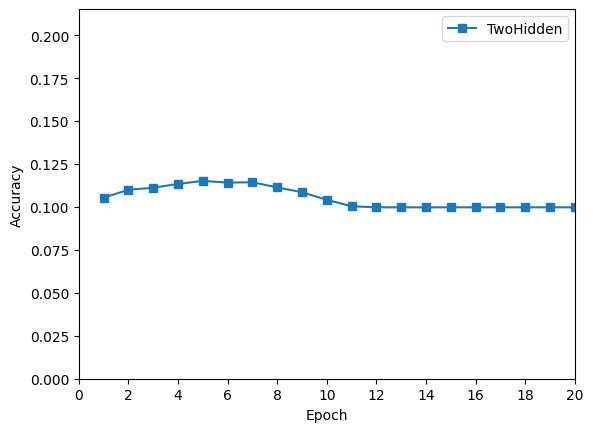

In [22]:
# 构建两隐藏层MLP
two_hidden_MLP = Network()
two_hidden_MLP.add(FCLayer(784, 128))
two_hidden_MLP.add(ReLULayer())           # 第一隐藏层激活
two_hidden_MLP.add(FCLayer(128, 64))
two_hidden_MLP.add(ReLULayer())           # 第二隐藏层激活
two_hidden_MLP.add(FCLayer(64, 10))       # 输出层

# 训练
two_hidden_MLP, two_loss, two_acc = train(two_hidden_MLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

# 测试
test(two_hidden_MLP, criterion, data_test, batch_size, disp_freq)

# 可视化
plot_loss_and_acc({'TwoHidden': [two_loss, two_acc]})